In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from statsmodels.tsa.stattools import adfuller

# Baca Dataframe

## Koneksi Dataset dari Database

In [3]:
file_path = 'C:/Users/HELLO/OneDrive/Desktop/skripsi/dataset-in/1_raw_data_transaksi_kopiin.csv'

In [4]:
raw_df = pd.read_csv(file_path, index_col=None, header=0, delimiter=';')

# Data Understanding

In [5]:
raw_df.columns

Index(['Outlet name', 'Merchant ID', 'Feature', 'Order ID', 'Transaction ID',
       'Amount', 'Net Amount', 'Transaction Status', 'Transaction time',
       'Payment Type', 'Payment Date', 'GO-PAY Transactions ID',
       'Gopay Reference Id', 'GoPay Customer ID', 'QRIS Transaction Type',
       'QRIS Reference ID', 'QRIS Issuer', 'QRIS Acquirer', 'Card Type',
       'Credit Card Number', 'Settlement Date', 'Settlement time'],
      dtype='object')

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Outlet name             435 non-null    object 
 1   Merchant ID             435 non-null    object 
 2   Feature                 435 non-null    object 
 3   Order ID                0 non-null      float64
 4   Transaction ID          435 non-null    object 
 5   Amount                  435 non-null    int64  
 6   Net Amount              435 non-null    int64  
 7   Transaction Status      435 non-null    object 
 8   Transaction time        435 non-null    object 
 9   Payment Type            435 non-null    object 
 10  Payment Date            435 non-null    object 
 11  GO-PAY Transactions ID  123 non-null    object 
 12  Gopay Reference Id      123 non-null    object 
 13  GoPay Customer ID       0 non-null      float64
 14  QRIS Transaction Type   123 non-null    ob

In [7]:
raw_df.shape

(435, 22)

In [8]:
raw_df.columns

Index(['Outlet name', 'Merchant ID', 'Feature', 'Order ID', 'Transaction ID',
       'Amount', 'Net Amount', 'Transaction Status', 'Transaction time',
       'Payment Type', 'Payment Date', 'GO-PAY Transactions ID',
       'Gopay Reference Id', 'GoPay Customer ID', 'QRIS Transaction Type',
       'QRIS Reference ID', 'QRIS Issuer', 'QRIS Acquirer', 'Card Type',
       'Credit Card Number', 'Settlement Date', 'Settlement time'],
      dtype='object')

# Data Processing

In [9]:
#Hapus Kolom yang tidak terpakai
df = raw_df.drop(columns = ['Outlet name', 'Merchant ID', 'Feature', 'Order ID',
       'Transaction Status', 'Transaction time', 'Transaction ID',
       'Payment Type', 'Payment Date', 'GO-PAY Transactions ID',
       'Gopay Reference Id', 'GoPay Customer ID', 'QRIS Transaction Type',
       'QRIS Reference ID', 'QRIS Issuer', 'QRIS Acquirer', 'Card Type',
       'Credit Card Number','Settlement time']).copy()            

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Amount           435 non-null    int64 
 1   Net Amount       435 non-null    int64 
 2   Settlement Date  435 non-null    object
dtypes: int64(2), object(1)
memory usage: 10.3+ KB


In [11]:
#Set Date Format
df['Settlement Date'] = pd.to_datetime(df['Settlement Date'], format='%d/%m/%Y')

In [12]:
#Gather Value of Net Revenue to Revenue
relevant_columns = (df['Net Amount'] !=0)
df.loc[relevant_columns, 'Amount'] = df.loc[relevant_columns, 'Net Amount']
df.drop(columns = ['Net Amount'], inplace = True)
print(df)

     Amount Settlement Date
0     66000      2023-08-01
1     17874      2023-08-01
2     18000      2023-08-01
3     22000      2023-08-01
4     34755      2023-08-01
..      ...             ...
430   20000      2024-01-30
431   58000      2024-01-30
432   44000      2024-01-30
433   45000      2024-01-30
434   58000      2024-01-30

[435 rows x 2 columns]


In [13]:
#See Missing Dates
date_range = pd.date_range(start='2023-08-01', end="2024-01-31")
date_difference = date_range.difference(df['Settlement Date'])
print(f'Missing dates: {date_difference}')

Missing dates: DatetimeIndex(['2023-08-04', '2023-08-05', '2023-08-06', '2023-08-12',
               '2023-08-26', '2023-08-27', '2023-08-31', '2023-09-04',
               '2023-09-08', '2023-09-13', '2023-09-17', '2023-09-24',
               '2023-09-26', '2023-09-29', '2023-09-30', '2023-10-01',
               '2023-10-02', '2023-10-07', '2023-10-11', '2023-10-14',
               '2023-10-15', '2023-10-18', '2023-10-20', '2023-10-28',
               '2023-11-04', '2023-11-05', '2023-11-06', '2023-11-07',
               '2023-11-08', '2023-11-09', '2023-11-11', '2023-11-12',
               '2023-11-18', '2023-11-19', '2023-11-20', '2023-11-28',
               '2023-11-30', '2023-12-01', '2023-12-02', '2023-12-03',
               '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12',
               '2023-12-13', '2023-12-15', '2023-12-16', '2023-12-17',
               '2023-12-18', '2023-12-19', '2023-12-21', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-28', '2023

In [14]:
#Group the data per Day
df = df.groupby(['Settlement Date'])['Amount'].sum().reset_index()
df.rename(columns={'Amount':'Revenue'}, inplace=True)

print(df)

    Settlement Date  Revenue
0        2023-08-01   193629
1        2023-08-02   326108
2        2023-08-03   368880
3        2023-08-07   178650
4        2023-08-08   168000
..              ...      ...
110      2024-01-26    98734
111      2024-01-27    45930
112      2024-01-28   188000
113      2024-01-29   363153
114      2024-01-30   225000

[115 rows x 2 columns]


In [15]:
## Set Index
df.set_index('Settlement Date', inplace=True)
df.sort_index(inplace=True)

In [16]:
df = df.asfreq('D')

In [17]:
print("Empty Value: ", df.isna().sum())

Empty Value:  Revenue    68
dtype: int64


In [18]:
weekly_avg = df['Revenue'].resample('W-MON', label='left', closed='left').mean()
weekly_avg_repeated = weekly_avg.asfreq('D').ffill()
print(weekly_avg_repeated)

Settlement Date
2023-07-31    296205.666667
2023-08-01    296205.666667
2023-08-02    296205.666667
2023-08-03    296205.666667
2023-08-04    296205.666667
                  ...      
2024-01-25    123471.285714
2024-01-26    123471.285714
2024-01-27    123471.285714
2024-01-28    123471.285714
2024-01-29    294076.500000
Freq: D, Name: Revenue, Length: 183, dtype: float64


In [19]:
df['Revenue'] = df['Revenue'].fillna(weekly_avg_repeated).copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2023-08-01 to 2024-01-30
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  183 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [21]:
df['Revenue'] = df['Revenue'].astype(int)

In [22]:
df_predict = df.resample('W').sum()

In [23]:
df_predict

,Revenue
Settlement Date,
2023-08-06,1777232
2023-08-13,1498560
2023-08-20,1282003
2023-08-27,1070723
2023-09-03,1309920
2023-09-10,1104254
2023-09-17,1493586
2023-09-24,803791
2023-10-01,1020202


<Axes: xlabel='Settlement Date'>

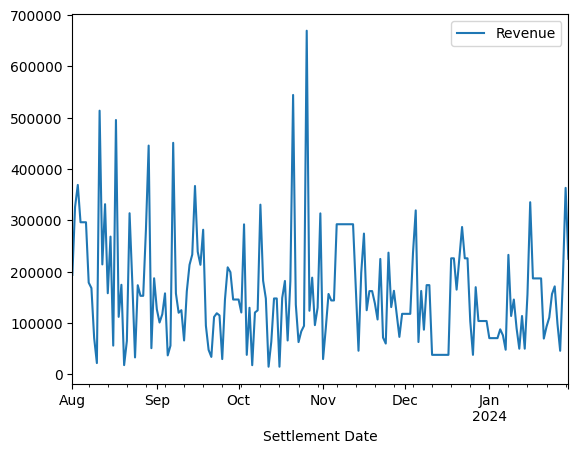

In [24]:
#Daily Revenue
df.plot()

                 Revenue
Settlement Date         
2023-08-06       1777232
2023-08-13       1498560
2023-08-20       1282003
2023-08-27       1070723
2023-09-03       1309920
2023-09-10       1104254
2023-09-17       1493586
2023-09-24        803791
2023-10-01       1020202
2023-10-08        843346
2023-10-15       1034686
2023-10-22       1273183
2023-10-29       1318378
2023-11-05       1007665
2023-11-12       2046394
2023-11-19       1135123
2023-11-26        969956
2023-12-03        825118
2023-12-10       1216420
2023-12-17        266000
2023-12-24       1582000
2023-12-31        727265
2024-01-07        493948
2024-01-14        795796
2024-01-21       1308049
2024-01-28        864299
2024-02-04        588153
(27, 1)


<Axes: xlabel='Settlement Date'>

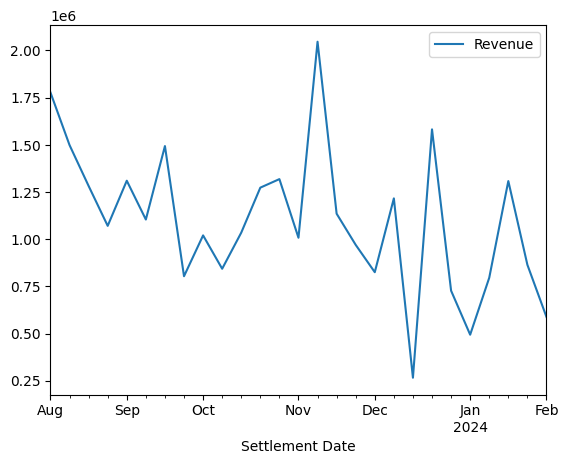

In [25]:
#Weekly Revenue
print(df_predict)
print(df_predict.shape)
df_predict.plot()

In [26]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2023-08-06 to 2024-02-04
Freq: W-SUN
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  27 non-null     int32
dtypes: int32(1)
memory usage: 324.0 bytes


In [27]:
df_predict.to_csv('C:/Users/HELLO/OneDrive/Desktop/skripsi/dataset-in/dataframe_final.csv')

### Stationary Test

In [72]:
#Method u/ test stasioner data peramalan
def stationarity_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print('Uji Stasionaritas:')
    print('ADF Statistic:', dftest[0])
    print('P-Value', dftest[1])
    print('Number of Lags:', dftest[2])
    print('Number of Observation Used in the Analysis:', dftest[3])
    print('Critical Values:')
    for key, value in dftest[4].items():
        print(f'\t{key}: {value}')
    if dftest[1] <= 0.05:
        print('Data Revenue SUDAH STASIONER')
    else:
        print('Data Revenue BELUM STASIONER')

In [73]:
stationarity_test(df['Revenue'])

Uji Stasionaritas:
ADF Statistic: -11.317006038007023
P-Value 1.199736112663074e-20
Number of Lags: 0
Number of Observation Used in the Analysis: 182
Critical Values:
	1%: -3.4668001583460613
	5%: -2.8775552336674317
	10%: -2.5753075498128246
Data Revenue SUDAH STASIONER


In [74]:
stationarity_test(df_predict['Revenue'])

Uji Stasionaritas:
ADF Statistic: -5.066503844220631
P-Value 1.636420211140918e-05
Number of Lags: 0
Number of Observation Used in the Analysis: 26
Critical Values:
	1%: -3.7112123008648155
	5%: -2.981246804733728
	10%: -2.6300945562130176
Data Revenue SUDAH STASIONER


# Data Modeling

In [75]:
#Install Library u/ data modeling
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from pmdarima.arima import auto_arima

## Daily Data

In [76]:
#Pencarian Ordo P,D,Q ARIMA
stepwise_fit = auto_arima(df['Revenue'], trace=True, suppress_warnings=True, d=0, stepwise=False, seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4979.355, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4915.921, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4893.529, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4881.054, Time=0.05 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=4881.135, Time=0.08 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=4873.919, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4836.031, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4773.195, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4771.122, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4771.618, Time=0.21 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=4773.478, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4811.015, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4772.968, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4775.145, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4773.638, Time=0.43 sec
 ARIMA(3,0

## Weekly Data

In [77]:
stepwise_fit_weekly = auto_arima(df_predict['Revenue'], trace=True, suppress_warnings=True, d=0, stepwise=False, seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=832.848, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=822.116, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=818.288, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=817.746, Time=0.03 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=815.566, Time=0.05 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=819.360, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=792.946, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=781.332, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=783.692, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=789.110, Time=0.07 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=788.903, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=785.365, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=782.693, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=782.895, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=785.920, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]  

## Split Train and Test Data

### Daily DataFrame

In [78]:
#Split Data Train data train 80%
train = df[(df.index >= pd.to_datetime('2023-08-01')) & (df.index <= pd.to_datetime('2023-12-24'))]
test = df[(df.index > pd.to_datetime('2023-12-24'))]
print(len(df))
print('Data Length:', 'Data Train',len(train),
      'Data Test',len(test))

183
Data Length: Data Train 146 Data Test 37


In [79]:
#Split Data Train data train 75%
train_second = df[(df.index >= pd.to_datetime('2023-08-01')) & (df.index <= pd.to_datetime('2023-12-15'))]
test_second = df[(df.index > pd.to_datetime('2023-12-15'))]
print(len(df))
print('Data Length:', 'Data Train',len(train_second),
      'Data Test',len(test_second))

183
Data Length: Data Train 137 Data Test 46


In [80]:
#Split Data Train data train 65%
train_third = df[(df.index >= pd.to_datetime('2023-08-01')) & (df.index <= pd.to_datetime('2023-11-25'))]
test_third = df[(df.index > pd.to_datetime('2023-11-25'))]
print(len(df))
print('Data Length:', 'Data Train',len(train_third),
      'Data Test',len(test_third))

183
Data Length: Data Train 117 Data Test 66


### Weekly DataFrame

In [81]:
#Split Data Train data train 75%
train_weekly = df_predict[(df_predict.index >= pd.to_datetime('2023-08-06')) & (df_predict.index <= pd.to_datetime('2023-12-17'))]
test_weekly = df_predict[(df_predict.index > pd.to_datetime('2023-12-17'))]
print(len(df_predict))
print('Data Length:', 'Data Train',len(train_weekly),
      'Data Test',len(test_weekly))

27
Data Length: Data Train 20 Data Test 7


In [82]:
#Split Data Train data train 85%
train_weekly_second = df_predict[(df_predict.index >= pd.to_datetime('2023-08-06')) & (df_predict.index <= pd.to_datetime('2023-12-31'))]
test_weekly_second = df_predict[(df_predict.index > pd.to_datetime('2023-12-31'))]
print(len(df_predict))
print('Data Length:', 'Data Train',len(train_weekly_second),
      'Data Test',len(test_weekly_second))

27
Data Length: Data Train 22 Data Test 5


In [83]:
#Split Data Train data train 90%
train_weekly_third = df_predict[(df_predict.index >= pd.to_datetime('2023-08-06')) & (df_predict.index <= pd.to_datetime('2024-01-14'))]
test_weekly_third = df_predict[(df_predict.index > pd.to_datetime('2024-01-14'))]
print(len(df_predict))
print('Data Length:', 'Data Train',len(train_weekly_third),
      'Data Test',len(test_weekly_third))

27
Data Length: Data Train 24 Data Test 3


## ARIMA(1,0,2)

### First Data Train

In [84]:
p, d, q = 1,0,2
model = ARIMA(train['Revenue'], order=(p,d,q))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  146
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1905.577
Date:                Tue, 20 Aug 2024   AIC                           3821.154
Time:                        08:11:06   BIC                           3836.072
Sample:                    08-01-2023   HQIC                          3827.216
                         - 12-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.704e+05   1.16e+04     14.630      0.000    1.48e+05    1.93e+05
ar.L1         -0.0812      1.354     -0.060      0.952      -2.734       2.572
ma.L1          0.2015      1.367      0.147      0.883      -2.477       2.880
ma.L2          0.0909      0.172      0.528      0.598      -0.247       0.429
sigma2       1.28e+10      0.074   1.74e+11      0.000    1.28e+10    1.28e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               117.99
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+26. Standard errors may be unstable.
"""

### Second Data Train

In [85]:
p, d, q = 1,0,2
model_second = ARIMA(train_second['Revenue'], order=(p,d,q))
model_fit_second=model_second.fit()
model_fit_second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  137
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1790.474
Date:                Tue, 20 Aug 2024   AIC                           3590.949
Time:                        08:11:06   BIC                           3605.549
Sample:                    08-01-2023   HQIC                          3596.882
                         - 12-15-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.695e+05   1.18e+04     14.399      0.000    1.46e+05    1.93e+05
ar.L1         -0.1511      1.639     -0.092      0.927      -3.364       3.062
ma.L1          0.2545      1.652      0.154      0.878      -2.983       3.492
ma.L2          0.0874      0.175      0.498      0.618      -0.256       0.431
sigma2      1.323e+10      0.077   1.72e+11      0.000    1.32e+10    1.32e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               110.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             1.49
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+26. Standard errors may be unstable.
"""

### Third Data Train

In [86]:
p, d, q = 1,0,2
model_third = ARIMA(train_third['Revenue'], order=(p,d,q))
model_fit_third=model_third.fit()
model_fit_third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  117
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1533.334
Date:                Tue, 20 Aug 2024   AIC                           3076.668
Time:                        08:11:06   BIC                           3090.478
Sample:                    08-01-2023   HQIC                          3082.275
                         - 11-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.783e+05   1.27e+04     14.067      0.000    1.53e+05    2.03e+05
ar.L1         -0.3813      2.208     -0.173      0.863      -4.708       3.946
ma.L1          0.4474      2.214      0.202      0.840      -3.893       4.788
ma.L2          0.0653      0.146      0.447      0.655      -0.221       0.352
sigma2      1.435e+10      0.069   2.07e+11      0.000    1.43e+10    1.43e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                70.89
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             1.37
Prob(H) (two-sided):                  0.81   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.4e+26. Standard errors may be unstable.
"""

## ARIMA(1,0,1)

### first data train

In [87]:
p, d, q = 1,0,1
model = ARIMA(train_weekly['Revenue'], order=(p,d,q))
model_fit_weekly=model.fit()
model_fit_weekly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -283.501
Date:                Tue, 20 Aug 2024   AIC                            575.002
Time:                        08:11:06   BIC                            578.985
Sample:                    08-06-2023   HQIC                           575.779
                         - 12-17-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.165e+06   9.17e+04     12.704      0.000    9.85e+05    1.34e+06
ar.L1         -0.9974      0.078    -12.855      0.000      -1.149      -0.845
ma.L1          0.9667      0.521      1.857      0.063      -0.054       1.987
sigma2      1.326e+11      0.013   1.06e+13      0.000    1.33e+11    1.33e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.33   Prob(JB):                         0.79
Heteroskedasticity (H):               2.45   Skew:                             0.22
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+29. Standard errors may be unstable.
"""

### second data train

In [140]:
p, d, q = 1,0,1
model_weekly_second = ARIMA(train_weekly_second['Revenue'], order=(p,d,q))
model_fit_weekly_second=model_weekly_second.fit()
model_fit_weekly_second.summary()

C:\Users\HELLO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   22
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -311.300
Date:                Tue, 20 Aug 2024   AIC                            630.600
Time:                        08:13:08   BIC                            634.964
Sample:                    08-06-2023   HQIC                           631.628
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.164e+06   7.97e+04     14.595      0.000    1.01e+06    1.32e+06
ar.L1         -0.9924      0.086    -11.595      0.000      -1.160      -0.825
ma.L1          0.9265      0.422      2.198      0.028       0.100       1.753
sigma2      1.203e+11      0.008   1.44e+13      0.000     1.2e+11     1.2e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.58   Prob(JB):                         0.81
Heteroskedasticity (H):               1.56   Skew:                             0.21
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.69e+29. Standard errors may be unstable.
"""

### third data train

In [89]:
p, d, q = 1,0,1
model_weekly_third = ARIMA(train_weekly_third['Revenue'], order=(p,d,q))
model_fit_weekly_third=model_weekly_third.fit()
model_fit_weekly_third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   24
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -341.746
Date:                Tue, 20 Aug 2024   AIC                            691.491
Time:                        08:11:06   BIC                            696.203
Sample:                    08-06-2023   HQIC                           692.741
                         - 01-14-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.121e+06   8.64e+04     12.973      0.000    9.51e+05    1.29e+06
ar.L1         -0.9986      0.041    -24.594      0.000      -1.078      -0.919
ma.L1          0.9782      0.314      3.117      0.002       0.363       1.593
sigma2      1.488e+11      0.007   2.06e+13      0.000    1.49e+11    1.49e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.38   Prob(JB):                         0.91
Heteroskedasticity (H):               1.92   Skew:                            -0.00
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+30. Standard errors may be unstable.
"""

# Test Model

## Ordo (1,0,2)

### First Data Train

<Axes: xlabel='Settlement Date'>

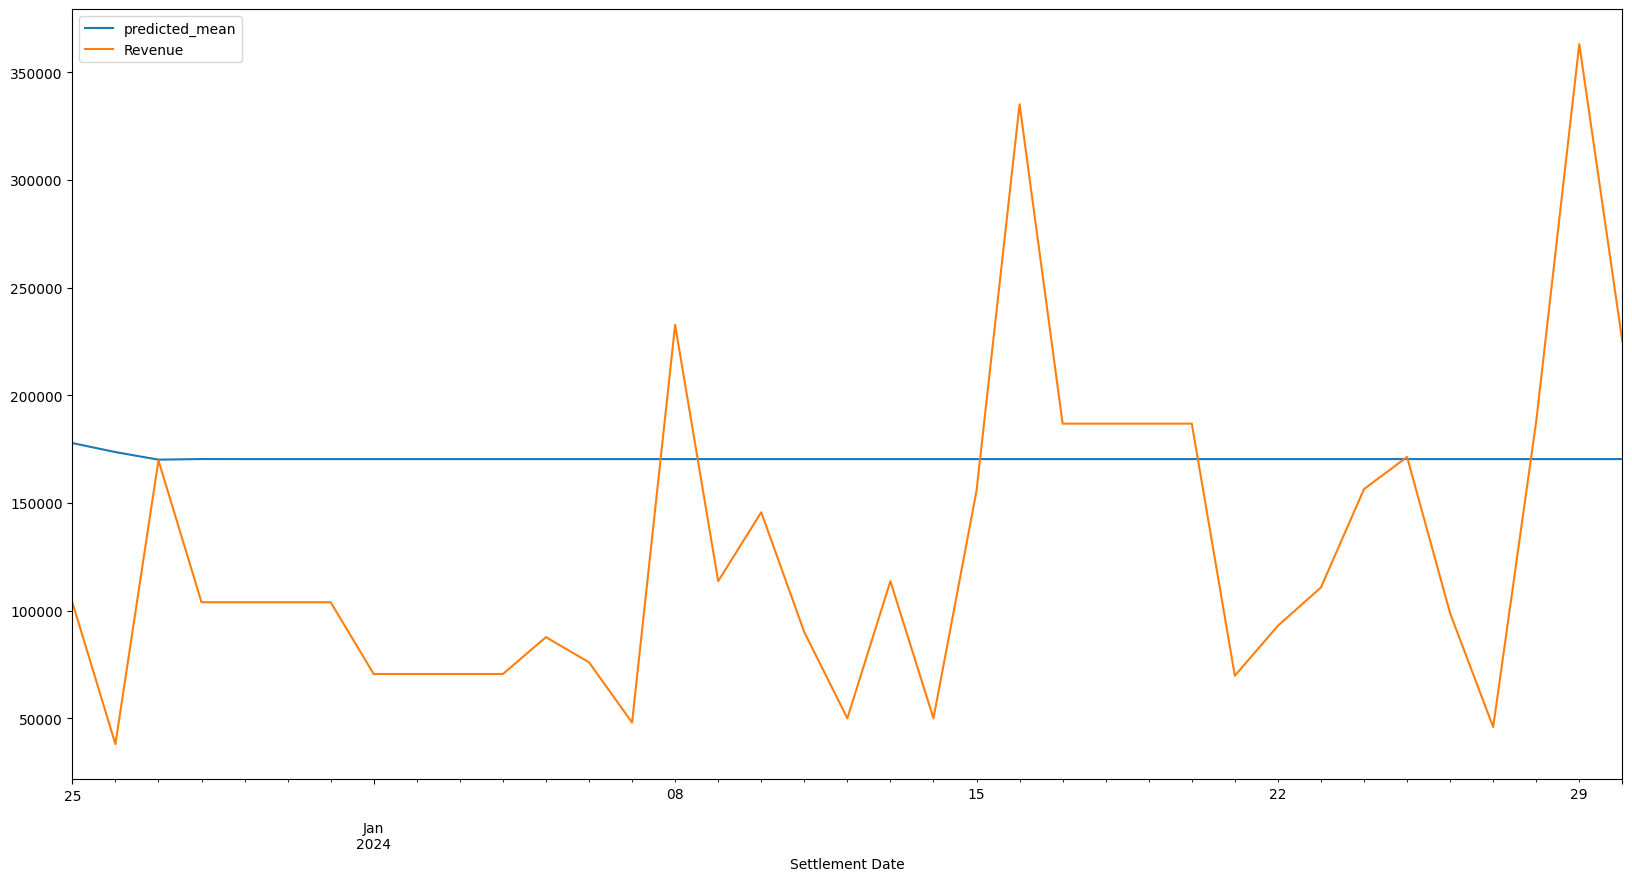

In [90]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end)
pred.index = df.index[start:end+1]

pred.plot(figsize=(20,10), legend=True)
test['Revenue'].plot(legend=True)

In [91]:
pred_df = pd.DataFrame({'Forecast': pred})

In [92]:
pred_df['Forecast'] = pred_df['Forecast'].astype(int)

In [93]:
comb_df = pd.concat([pred_df, test], axis=1)
comb_df = comb_df.reset_index().copy()
print(comb_df)

   Settlement Date  Forecast  Revenue
0       2023-12-25    177839   103895
1       2023-12-26    173648    38000
2       2023-12-27    170137   169790
3       2023-12-28    170422   103895
4       2023-12-29    170399   103895
5       2023-12-30    170401   103895
6       2023-12-31    170400   103895
7       2024-01-01    170400    70564
8       2024-01-02    170400    70564
9       2024-01-03    170400    70564
10      2024-01-04    170400    70564
11      2024-01-05    170400    87692
12      2024-01-06    170400    76000
13      2024-01-07    170400    48000
14      2024-01-08    170400   232720
15      2024-01-09    170400   113685
16      2024-01-10    170400   145706
17      2024-01-11    170400    90000
18      2024-01-12    170400    50000
19      2024-01-13    170400   113685
20      2024-01-14    170400    50000
21      2024-01-15    170400   155629
22      2024-01-16    170400   335209
23      2024-01-17    170400   186864
24      2024-01-18    170400   186864
25      2024

### Second Data Train

<Axes: xlabel='Settlement Date'>

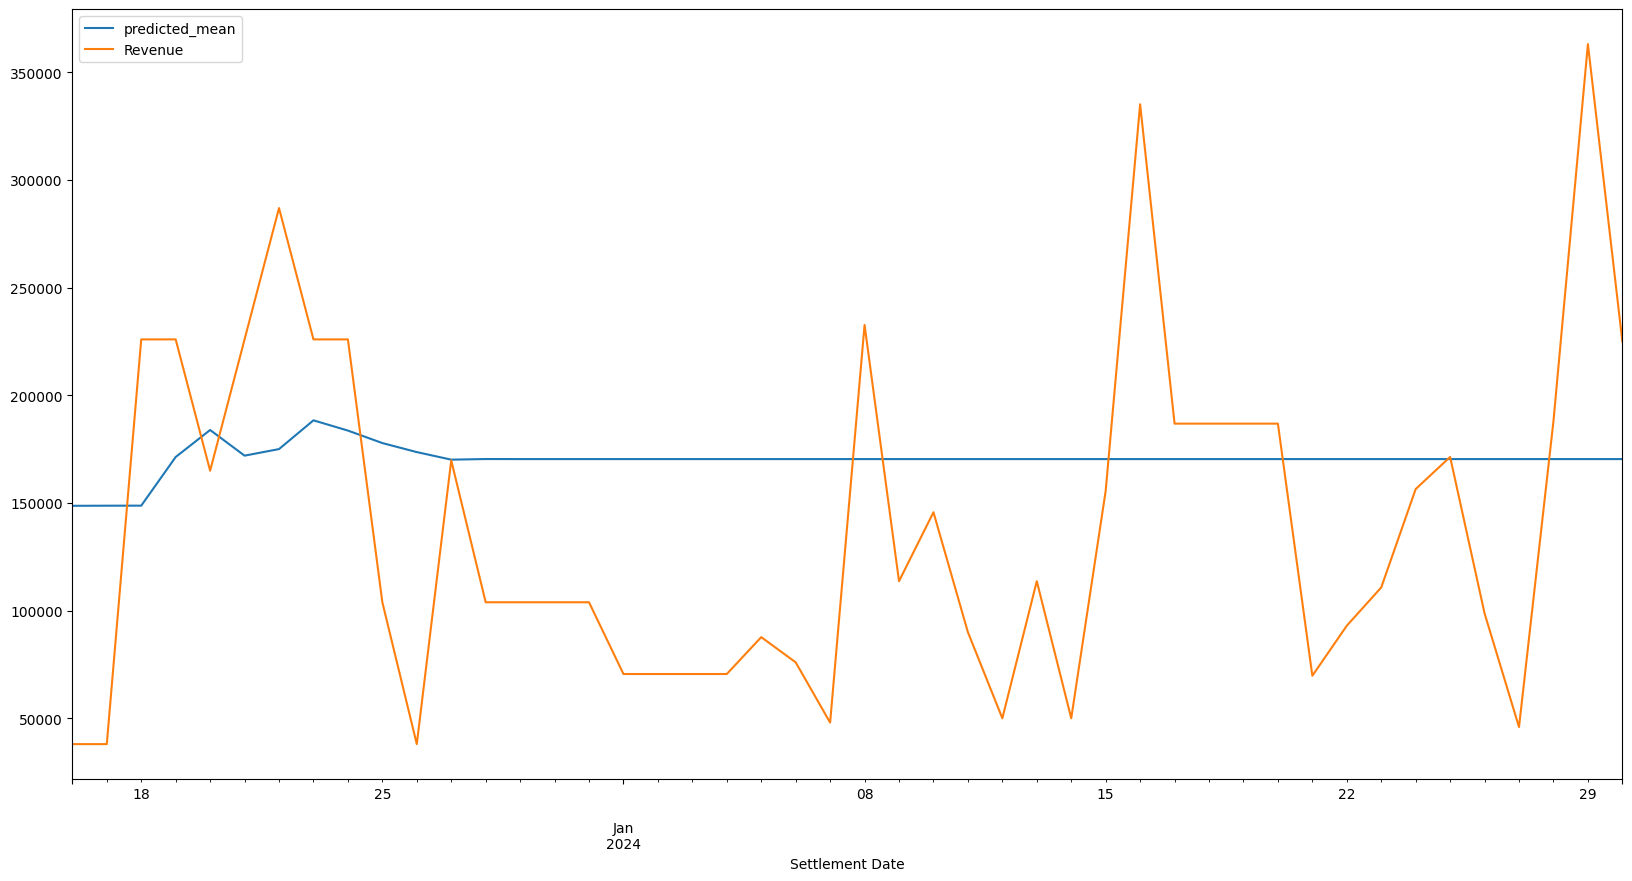

In [94]:
start_second = len(train_second)
end_second = len(train_second) + len(test_second) - 1
pred_second = model_fit.predict(start=start_second, end=end_second)
pred_second.index = df.index[start_second:end_second+1]

pred_second.plot(figsize=(20,10), legend=True)
test_second['Revenue'].plot(legend=True)

In [95]:
pred_second_df = pd.DataFrame({'Forecast': pred_second})

In [96]:
pred_second_df['Forecast'] = pred_second_df['Forecast'].astype(int)

In [97]:
comb_second_df = pd.concat([pred_second_df, test_second], axis=1)
comb_second_df = comb_second_df.reset_index().copy()
print(comb_second_df)

   Settlement Date  Forecast  Revenue
0       2023-12-16    148694    38000
1       2023-12-17    148751    38000
2       2023-12-18    148771   226000
3       2023-12-19    171374   226000
4       2023-12-20    183914   165000
5       2023-12-21    171995   226000
6       2023-12-22    175046   287000
7       2023-12-23    188400   226000
8       2023-12-24    183642   226000
9       2023-12-25    177839   103895
10      2023-12-26    173648    38000
11      2023-12-27    170137   169790
12      2023-12-28    170422   103895
13      2023-12-29    170399   103895
14      2023-12-30    170401   103895
15      2023-12-31    170400   103895
16      2024-01-01    170400    70564
17      2024-01-02    170400    70564
18      2024-01-03    170400    70564
19      2024-01-04    170400    70564
20      2024-01-05    170400    87692
21      2024-01-06    170400    76000
22      2024-01-07    170400    48000
23      2024-01-08    170400   232720
24      2024-01-09    170400   113685
25      2024

### Third Data Train

<Axes: xlabel='Settlement Date'>

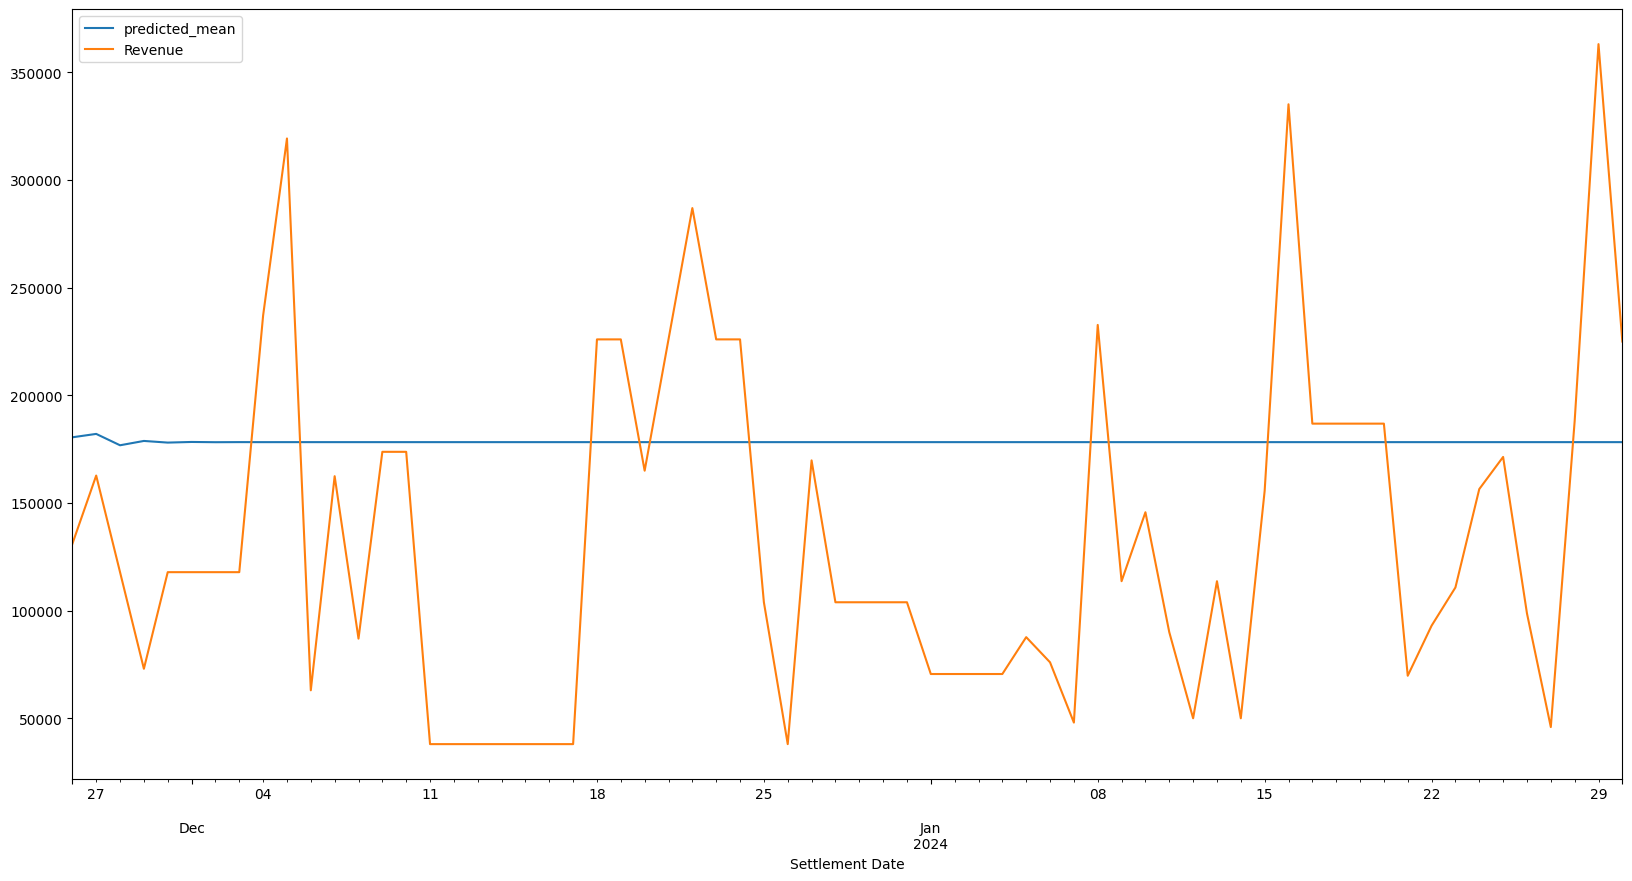

In [98]:
start_third = len(train_third)
end_third = len(train_third) + len(test_third) - 1
pred_third = model_fit_third.predict(start=start_third, end=end_third)
pred_third.index = df.index[start_third:end_third+1]

pred_third.plot(figsize=(20,10), legend=True)
test_third['Revenue'].plot(legend=True)

In [99]:
pred_third_df = pd.DataFrame({'Forecast': pred_third})

In [100]:
pred_third_df['Forecast'] = pred_third_df['Forecast'].astype(int)

In [101]:
comb_third_df = pd.concat([pred_third_df, test_third], axis=1)
comb_third_df = comb_third_df.reset_index().copy()
print(comb_third_df)

   Settlement Date  Forecast  Revenue
0       2023-11-26    180521   131000
1       2023-11-27    182096   162748
2       2023-11-28    176816   117874
3       2023-11-29    178829    73000
4       2023-11-30    178061   117874
..             ...       ...      ...
61      2024-01-26    178273    98734
62      2024-01-27    178273    45930
63      2024-01-28    178273   188000
64      2024-01-29    178273   363153
65      2024-01-30    178273   225000

[66 rows x 3 columns]


## Ordo (1,0,1) Weekly

### First Data Train

<Axes: xlabel='Settlement Date'>

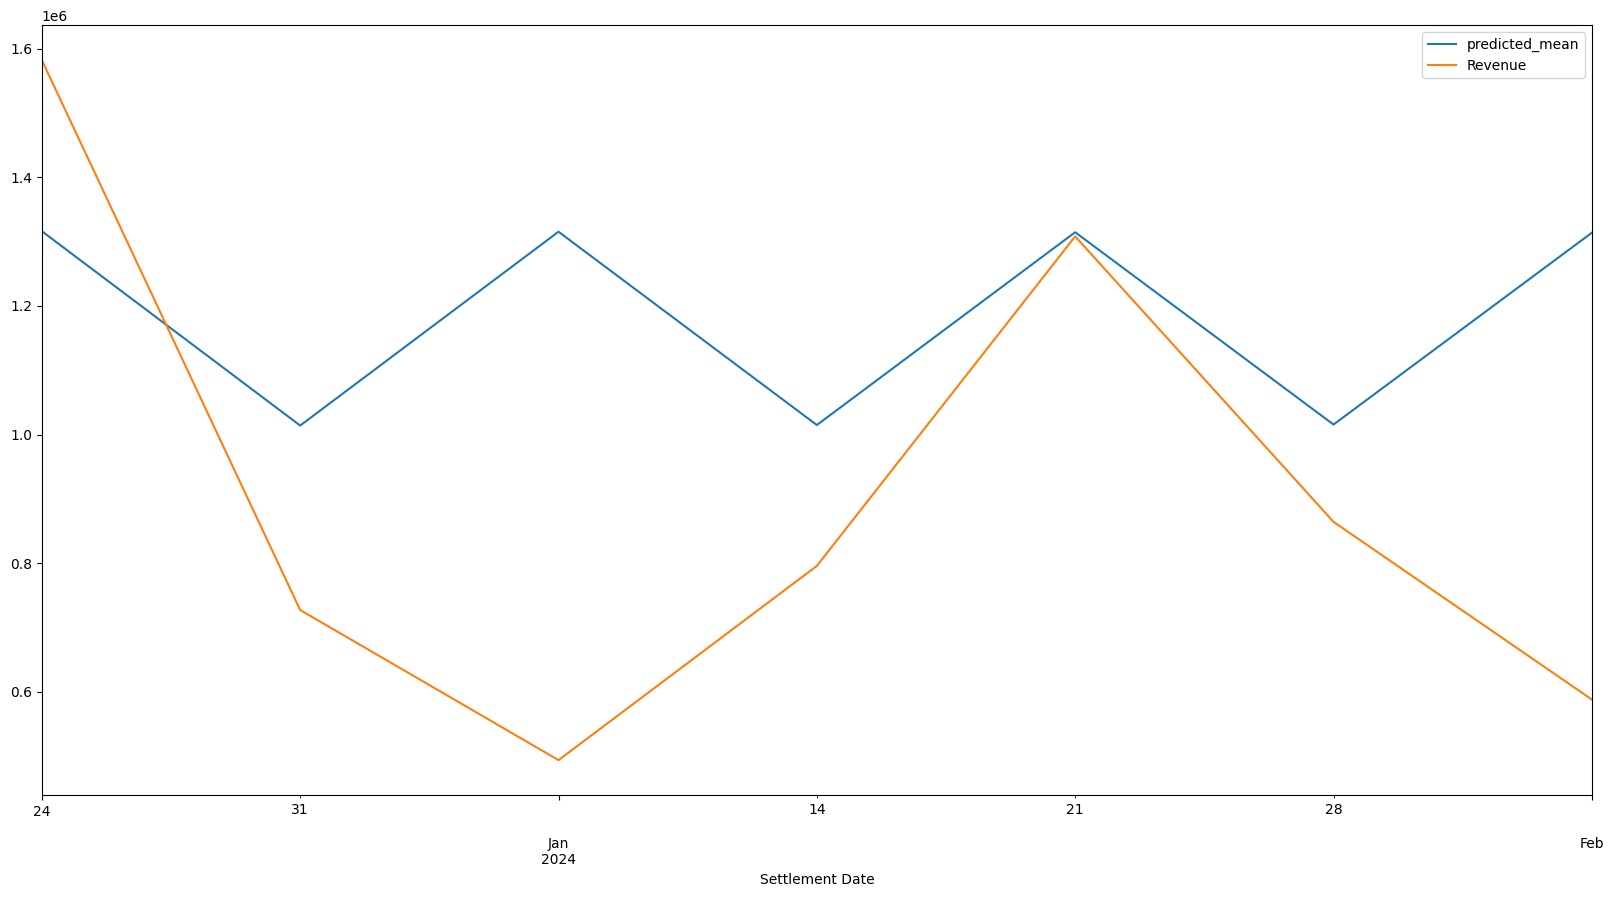

In [102]:
start_weekly = len(train_weekly)
end_weekly = len(train_weekly) + len(test_weekly) - 1
pred_weekly = model_fit_weekly.predict(start=start_weekly, end=end_weekly)
pred_weekly.index=df_predict.index[start_weekly:end_weekly+1]
    
pred_weekly.plot(figsize=(20,10), legend=True)
test_weekly['Revenue'].plot(legend=True)

In [103]:
pred_df_weekly = pd.DataFrame({'Forecast': pred_weekly})

In [104]:
pred_df_weekly['Forecast'] = pred_df_weekly['Forecast'].astype(int)

In [105]:
comb_df_weekly = pd.concat([pred_df_weekly, test_weekly], axis=1)
comb_df_weekly = comb_df_weekly.reset_index().copy()
print(comb_df_weekly)

  Settlement Date  Forecast  Revenue
0      2023-12-24   1316056  1582000
1      2023-12-31   1013993   727265
2      2024-01-07   1315264   493948
3      2024-01-14   1014784   795796
4      2024-01-21   1314476  1308049
5      2024-01-28   1015570   864299
6      2024-02-04   1313692   588153


### Second Data Train

<Axes: xlabel='Settlement Date'>

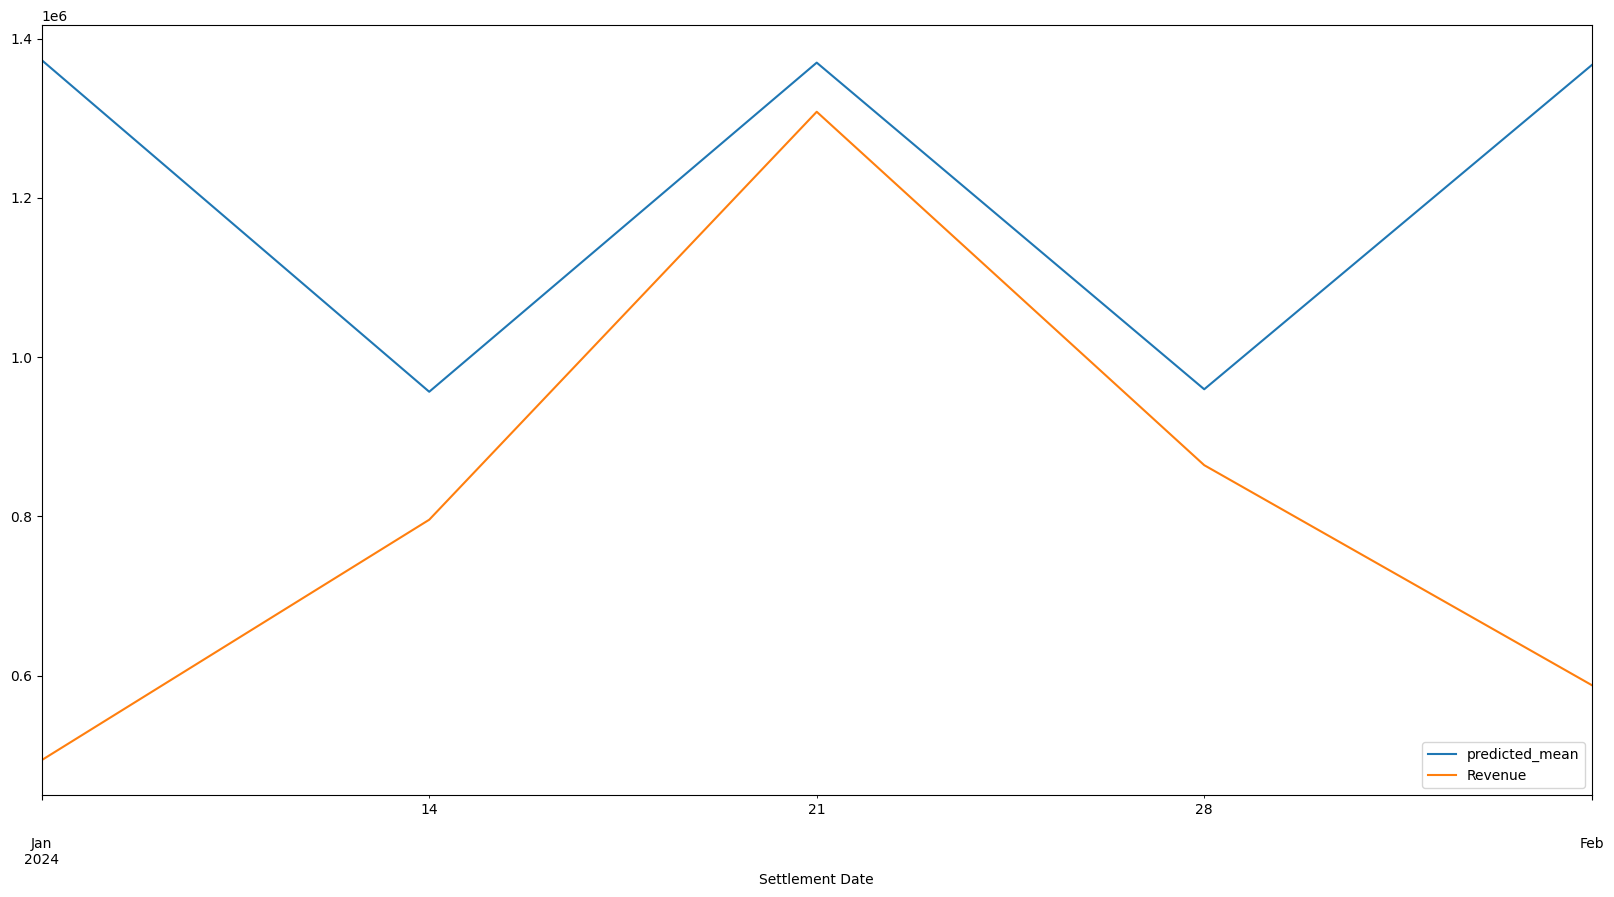

In [144]:
start_weekly_second = len(train_weekly_second)
end_weekly_second = len(train_weekly_second) + len(test_weekly_second) - 1
pred_weekly_second = model_fit_weekly_second.predict(start=start_weekly_second, end=end_weekly_second)
pred_weekly_second.index=df_predict.index[start_weekly_second:end_weekly_second+1]

pred_weekly_second.plot(figsize=(20,10), legend=True)
test_weekly_second['Revenue'].plot(legend=True)

In [145]:
pred_df_weekly_second = pd.DataFrame({'Forecast': pred_weekly_second})

In [146]:
pred_df_weekly_second['Forecast'] = pred_df_weekly_second['Forecast'].astype(int)

In [147]:
pred_df_weekly_second

,Forecast
Settlement Date,
2024-01-07,1372898
2024-01-14,956483
2024-01-21,1369747
2024-01-28,959610
2024-02-04,1366644


### Third Data Train

<Axes: xlabel='Settlement Date'>

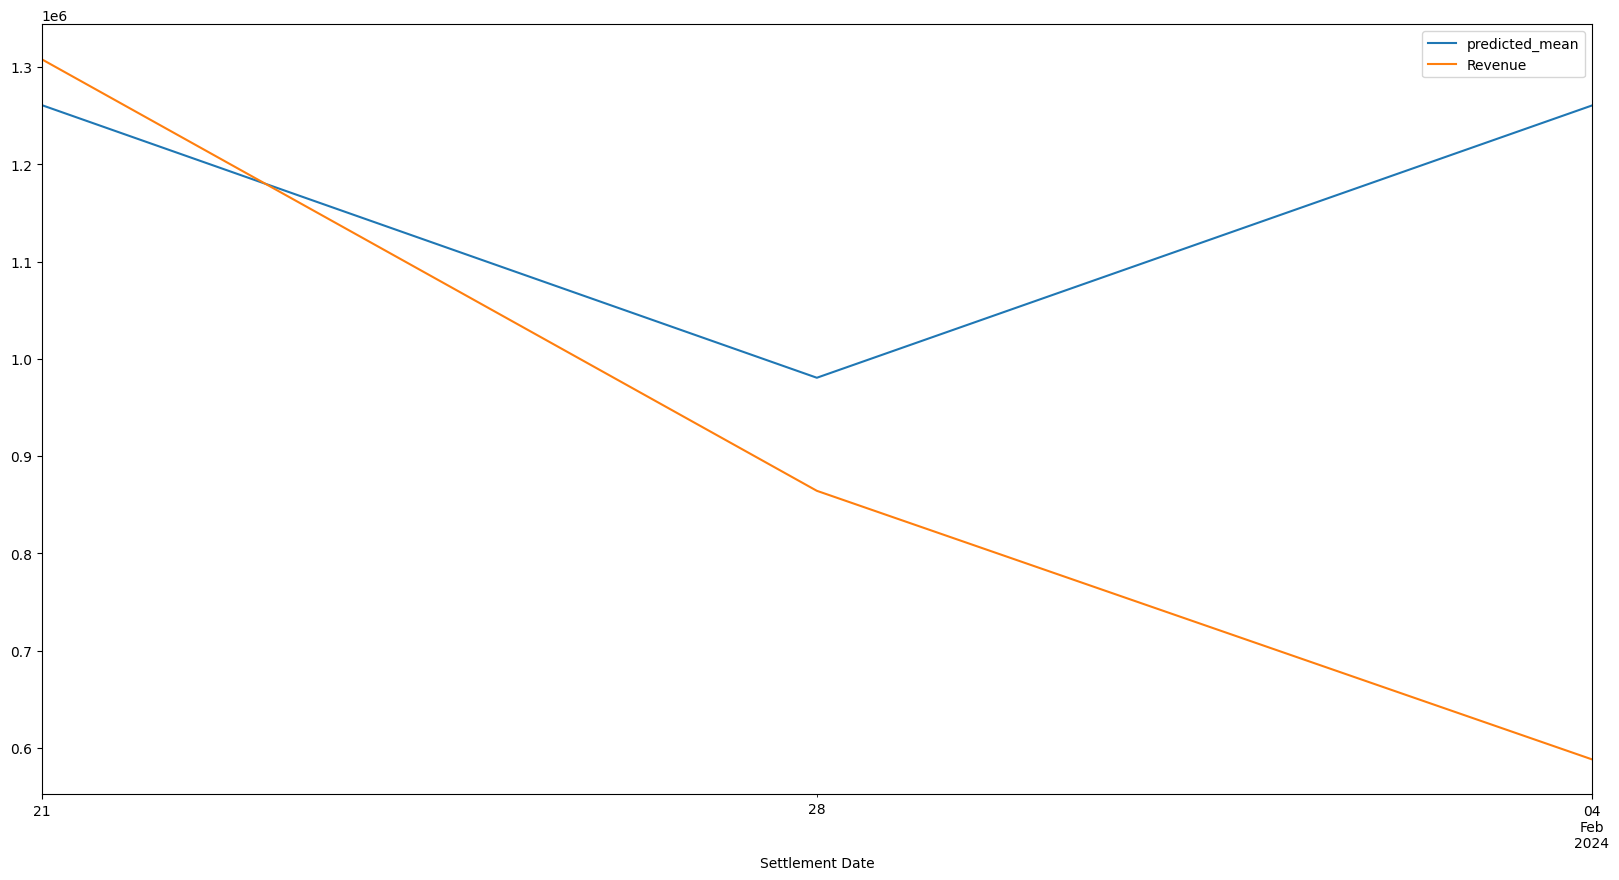

In [141]:
start_weekly_third = len(train_weekly_third)
end_weekly_third = len(train_weekly_third) + len(test_weekly_third) - 1
pred_weekly_third = model_fit_weekly_third.predict(start=start_weekly_third, end=end_weekly_third)
pred_weekly_third.index=df_predict.index[start_weekly_third:end_weekly_third+1]

pred_weekly_third.plot(figsize=(20,10), legend=True)
test_weekly_third['Revenue'].plot(legend=True)

In [142]:
pred_df_weekly_third = pd.DataFrame({'Forecast': pred_weekly_third})

In [143]:
pred_df_weekly_third['Forecast'] = pred_df_weekly_third['Forecast'].astype(int)

In [154]:
comb_df_weekly_third = pd.concat([pred_df_weekly_third, test_weekly_third], axis=1)
comb_df_weekly_third = comb_df_weekly_third.reset_index().copy()
print(comb_df_weekly_third)

  Settlement Date  Forecast  Revenue
0      2024-01-21   1260926  1308049
1      2024-01-28    980567   864299
2      2024-02-04   1260529   588153


# Evaluasi Model

In [109]:
def evaluate_mae(pred, test, df):
    average_revenue = df.mean()
    mae = mean_absolute_error(pred, test)
    mae_percentage = (mae/average_revenue) * 100
    print(f'Mean Absolute Error: {mae}')
    print(f'Rata Rata Revenue: {average_revenue}')
    print(f'Persentase MAE dari rata rata Revenue: {mae_percentage}')

In [110]:
def evaluate_mape(pred, test):
    mape = mean_absolute_percentage_error(pred, test) * 100
    if mape < 10: 
        return f'Kemampuan peramalan sangat baik digunakan, persentase error sebesar: {mape}%'
    elif mape < 20: 
        return f'Kemampuan peramalan baik digunakan, persentase error sebesar: {mape}%' 
    elif mape < 50: 
        return f'Kemampuan peramalan layak digunakan, persentase error sebesar: {mape}%'  
    else: 
        return f'Kemampuan peramalan buruk, persentase error sebesar: {mape}%'

In [111]:
def evaluate_rmse(pred, test):
    rmse = root_mean_squared_error(pred, test)
    return f'Root Mean Squared Error sebesar: {rmse}'

## (1, 0, 2)

### First Data Test

In [112]:
evaluate_mae(pred_df, test, df)

Mean Absolute Error: 71773.18918918919
Rata Rata Revenue: Revenue    162054.918033
dtype: float64
Persentase MAE dari rata rata Revenue: Revenue    44.289424
dtype: float64


In [113]:
evaluate_mape(pred_df, test)

'Kemampuan peramalan layak digunakan, persentase error sebesar: 42.03098661750154%'

In [114]:
evaluate_rmse(pred_df,test)

'Root Mean Squared Error sebesar: 16651.962155302346'

### Second Data Test

In [115]:
evaluate_mae(pred_second_df, test_second, df)

Mean Absolute Error: 71168.23913043478
Rata Rata Revenue: Revenue    162054.918033
dtype: float64
Persentase MAE dari rata rata Revenue: Revenue    43.916124
dtype: float64


In [116]:
evaluate_mape(pred_second_df, test_second)

'Kemampuan peramalan layak digunakan, persentase error sebesar: 42.09770764672987%'

In [117]:
evaluate_rmse(pred_second_df, test_second)

'Root Mean Squared Error sebesar: 15606.04977244402'

### Third Data Test

In [118]:
evaluate_mae(pred_third_df, test_third, df)

Mean Absolute Error: 76388.19696969698
Rata Rata Revenue: Revenue    162054.918033
dtype: float64
Persentase MAE dari rata rata Revenue: Revenue    47.137228
dtype: float64


In [119]:
evaluate_mape(pred_third_df, test_third)

'Kemampuan peramalan layak digunakan, persentase error sebesar: 42.842071047074306%'

In [120]:
evaluate_rmse(pred_third, test_third)

'Root Mean Squared Error sebesar: 89683.55260172673'

In [121]:
pred_third_df.isna().sum()

Forecast    0
dtype: int64

In [122]:
test_third.isna().sum()

Revenue    0
dtype: int64

## (1, 0, 1) Weekly

### First Data Test

In [123]:
evaluate_mae(pred_df_weekly, test_weekly, df_predict)

Mean Absolute Error: 353744.71428571426
Rata Rata Revenue: Revenue    1.098372e+06
dtype: float64
Persentase MAE dari rata rata Revenue: Revenue    32.206269
dtype: float64


In [124]:
evaluate_mape(pred_df_weekly, test_weekly)

'Kemampuan peramalan layak digunakan, persentase error sebesar: 29.017516191736004%'

In [125]:
evaluate_rmse(pred_df_weekly, test_weekly)

'Root Mean Squared Error sebesar: 21219.13030061048'

### Second Data Test

In [148]:
evaluate_mae(pred_df_weekly_second, test_weekly_second, df_predict)

Mean Absolute Error: 395027.4
Rata Rata Revenue: Revenue    1.098372e+06
dtype: float64
Persentase MAE dari rata rata Revenue: Revenue    35.964802
dtype: float64


In [150]:
evaluate_mape(pred_df_weekly_second, test_weekly_second)

'Kemampuan peramalan layak digunakan, persentase error sebesar: 30.444316823325924%'

In [151]:
evaluate_rmse(pred_df_weekly_second, test_weekly_second)

C:\Users\HELLO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:571: RuntimeWarning: invalid value encountered in sqrt
  output_errors = np.sqrt(


'Root Mean Squared Error sebesar: nan'

### Third Data Test

In [126]:
evaluate_mae(pred_df_weekly_third, test_weekly_third, df_predict)

Mean Absolute Error: 278589.0
Rata Rata Revenue: Revenue    1.098372e+06
dtype: float64
Persentase MAE dari rata rata Revenue: Revenue    25.363806
dtype: float64


In [127]:
evaluate_mape(pred_df_weekly_third, test_weekly_third)

'Kemampuan peramalan layak digunakan, persentase error sebesar: 22.97839181135992%'

In [128]:
evaluate_rmse(pred_weekly_third, test_weekly_third)

'Root Mean Squared Error sebesar: 394896.29331966816'

# Implementasi Model Peramalan

In [129]:
#Index Periode Implementasi Peramalan

#30 Hari
index_future_dates_one_month = pd.date_range(start='2024-01-30', end='2024-02-29')
#14 Hari
index_future_dates_two_weeks = pd.date_range(start='2024-01-30', end='2024-02-13')
#7 Hari
index_future_dates_one_weeks = pd.date_range(start='2024-01-30', end='2024-02-06')

In [130]:
def predict_arima_daily(index_future_dates, n, model_fit):
    if n == 30:
        preds = model_fit.predict(start=len(df), end=len(df)+n).rename('30 Hari Peramalan menggunakan ARIMA')
        preds.index=index_future_dates
    elif n == 14:
        preds = model_fit.predict(start=len(df), end=len(df)+n).rename('14 Hari Peramalan menggunakan ARIMA')
        preds.index=index_future_dates
    elif n == 7:
        preds = model_fit.predict(start=len(df), end=len(df)+n).rename('7 Hari Peramalan menggunakan ARIMA')
        preds.index=index_future_dates
    else:
        print(f'Model hanya melakukan peramalan dalam periode 30 hari, 14 hari, 7 hari. Mohon masukan nilai n sesuai periode')
    print(preds)
    preds.plot(figsize=(12,5), legend=True)

In [131]:
def predict_arima_weekly(index_dates, n, model_fit):
    pass

## (1, 0, 2)

# Save Models Using Joblib

In [132]:
import joblib

## Daily Model

In [133]:
filename_daily = 'arima_model_daily.joblib'
joblib.dump(model_fit, filename_daily)

['arima_model_daily.joblib']

In [134]:
filename_daily_second = 'arima_model_daily_second.joblib'
joblib.dump(model_fit_second, filename_daily_second)

['arima_model_daily_second.joblib']

In [135]:
filename_daily_third = 'arima_model_daily_third.joblib'
joblib.dump(model_fit_third, filename_daily_third)

['arima_model_daily_third.joblib']

## Weekly Model

In [136]:
filename_weekly = 'arima_model_weekly.joblib'
joblib.dump(model_fit_weekly, filename_weekly)

['arima_model_weekly.joblib']

In [137]:
filename_weekly_second = 'arima_model_weekly_second.joblib'
joblib.dump(model_fit_weekly_second, filename_weekly_second)

['arima_model_weekly_second.joblib']

In [138]:
filename_weekly_third = 'arima_model_weekly_third.joblib'
joblib.dump(model_fit_weekly_third, filename_weekly_third)

['arima_model_weekly_third.joblib']